# What sort of films should we produce?
## Darryn J.

Blog:

Pace: flex

Instructor: Morgan Jones

Date: 4 - 10 - 24

## Overview

To start off this project, I first load in some usefull tools such as `matplotlib` to allow us to create graphs, or `pandas` to help with data cleaning. After this i load in the data sets, `bom.movie_gross.csv.gz` and `im.db.unzipped`,and assign it to `df` and `df2` respectively. Here is a quick overview of what takes place in this notebook -

- OVERVIEW
    - An index of what this notebook contains


- BUSINESS UNDERSTANDING
    - What data is being used and why


- DATA DISTRIBUTION
    - How is the data disributed within this dataframe


- METRICS
    - How will we measure the success of a film


- FUNCTIONS
    - Functions created for ease of use


- DATA MANIPULATION
    - Simple changes to data to make information gathering easier


- Revenue
    - What can we do to maximise revenue
        - Domestic vs. Foreign

- GENRE
    - How does genre effect the success of a film


- RATING
    - How does rating effet the success of a film

## Business Understanding

Using the `bom.movie_gross.csv.gz` data set, along with `im.db.unzipped` SQL file, we will look into what the current top films by revenue and ratings are and what decisions on film types we should make as a company to maximise success.

## Data Distribution

Here we will look at the disribution of the 2 data sets, revenue and rating.

Utilized function:

`year_gross`

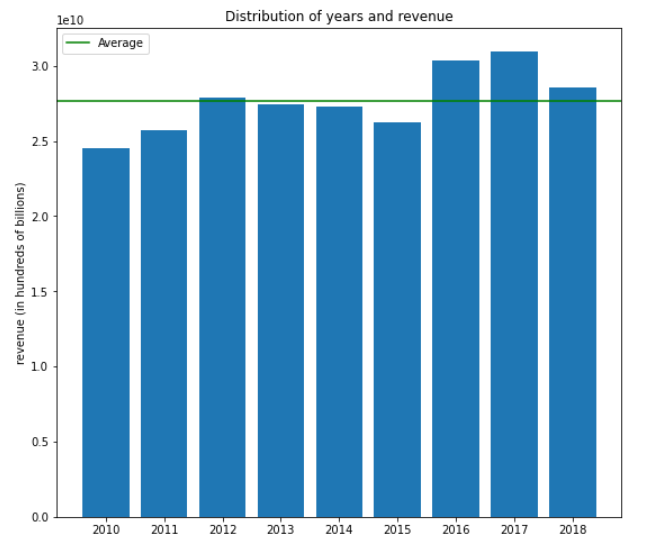

Utilized function:

`df2_avg_rating`

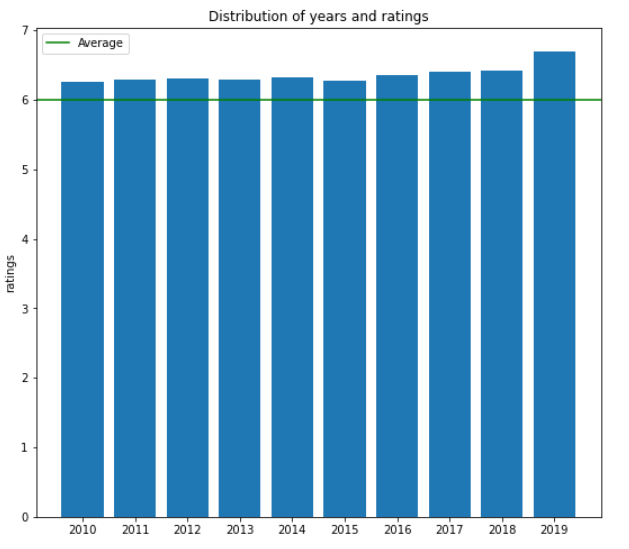

## Metrics

- revenue
    - what can we do to maximise revenue


- Genre
    - How does genre effect film performance


- Rating
    - How does rating effect film performance

## Functions

Here we use `def` or define, to create several code blocks that automatically exicute several lines of code when given specific information. These are called `functions`. This is done to gather information for several variables without re-writting the code each time. These functions gather this information -

- `get_g_rating`
    - gathers the average rating for a specified genre


- `year_gross`
    - finds the gross revinue for a given year


- `df2_avg_rating`
    - finds the average rating for a given year

In [1]:
# create function to gather the average for a specified genre

def get_g_rating(genre):
    g_list = df2[df2['genres'] == genre] # only use entries that are the specified genre
    sum_rating = sum(g_list['averagerating']) # sum all ratings together
    avg = sum_rating / len(g_list['averagerating']) # devide the sum of the ratings by the total entry count
    rounded = round(avg, 2) # round
    return rounded # output

In [2]:
# create function to find the gross revinue for a given year

def year_gross(year):
    year_list = df[df['year'] == year] # only use entires that are the specified year
    gross = sum(year_list['total_gross']) # add all income togehter 
    return gross # output

In [3]:
# create finction to find the average rating for a given year

def df2_avg_rating(year):
    year_list = df2[df2['start_year'] == year] # only use entries that are specified year
    sum_rating = sum(year_list['averagerating']) # add togehter all ratings
    avg_rating = sum_rating / len(year_list['averagerating']) # devide to get average
    rounded = round(avg_rating, 2) # round
    return rounded # output

# Data Manipulation

Here we load in some usefull libraries that make data analysis and gathering easier and quicker

In [4]:
import pandas as pd
import sqlite3 
import matplotlib.pyplot as plt
import numpy as np
from pandasql import sqldf
%matplotlib inline

Load in `bom.movie_gross.csv.gz` data set and assign to df. This is the data we will use to look into the gross revenue for individual films

In [5]:
df = pd.read_csv('bom.movie_gross.csv.gz')

Next, we will create a connection to a SQL file (`im.db.unzipped`) to gather some infomation regarding genre and rating for films.

In [6]:
conn = sqlite3.connect('im.db.unzipped')

In [7]:
df2 = pd.read_sql('''
select *
from movie_basics
join movie_ratings
using (movie_id)
''', conn)

This code snipped below simply alters the way pandas displays numbers, changing it from displaying a large amount of 0's after the decimal, to only displaying 2 numbers after the decimal.

In [8]:
pd.options.display.float_format = '{:.2f}'.format

Lets quicky take a glance at how the dataframe is set up. Here we can see an interesting data type, with `foreign_gross` being displayed as an object, rather than an intiger or a float. I wonder why that is? lets do some digging to see if we can find out why.

- String
    - stored information. numbers can be considered a string but can not be added to other numbers
- Intiger
    - Any real number
- Float
    - A number that has a decimal 

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


Firstly, lets replace all `NULL` values with 0.0, and 'unk' for strings, as this will make data minipulation easier in the future

In [10]:
df['foreign_gross'].fillna(0.0, inplace = True)

In [11]:
df['domestic_gross'].fillna(0.0, inplace = True)

In [12]:
df2['genres'].fillna('unk', inplace = True)

In [13]:
df['year'].fillna('unk', inplace = True)

Below, we can see what happens when we try to change the data type from object to float. We recieve an error. Upon looking into the error, we see that at the bottom is says *ValueError: could not convert string to float: '1,131.6'*. This is a great hint as to why this data was put in as an object, instead of a float. Its because commas can't be numbers! so lets remove commas from anywhere that has them and see if we can then convert the data to float.

Screenshot of the error, so that the code can still run past this code block

`df['foreign_gross'].astype(float)`

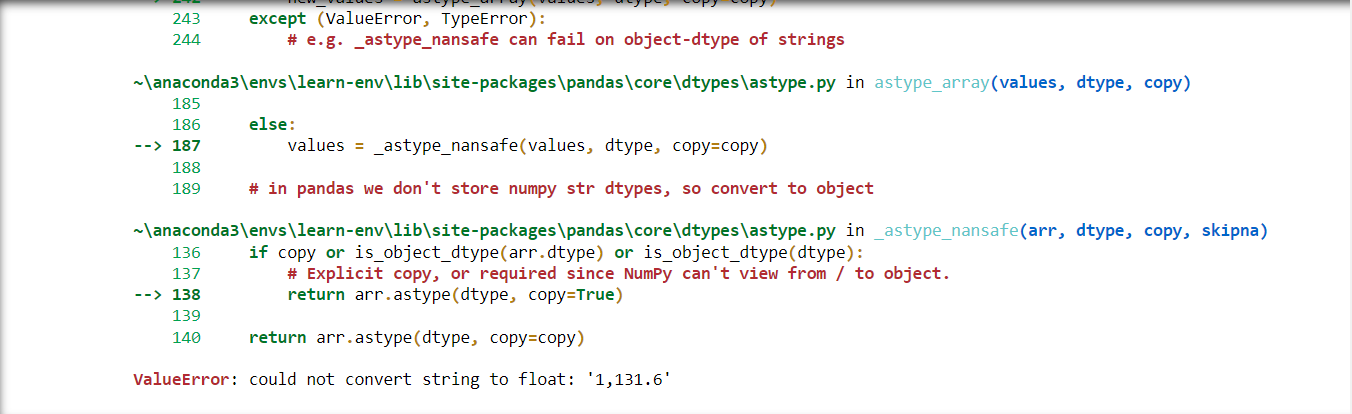

In [14]:
df[df['foreign_gross'].str.contains(',') == True]

,title,studio,domestic_gross,foreign_gross,year
1872,Star Wars: The Force Awakens,BV,936700000.00,"1,131.6",2015
1873,Jurassic World,Uni.,652300000.00,"1,019.4",2015
1874,Furious 7,Uni.,353000000.00,"1,163.0",2015
2760,The Fate of the Furious,Uni.,226000000.00,"1,010.0",2017
3079,Avengers: Infinity War,BV,678800000.00,"1,369.5",2018


Here we can see there's actually 5 entries that have commas in them. Now lets replace all commas with empty space

In [15]:
df['foreign_gross'] = df['foreign_gross'].str.replace(',','')

Change the data type to float

In [16]:
df['foreign_gross'] = df['foreign_gross'].astype(float)

And finally we can now add together `domestic_gross` and `foreign_gross` to get `total_gross`

In [17]:
df['total_gross'] = df['domestic_gross'] + df['foreign_gross']

# Revenue

Lets go ahead and sort by `total_gross` to see what films have the highest revenue.

In [18]:
df.sort_values(by = 'total_gross', ascending = False).head(10)

,title,studio,domestic_gross,foreign_gross,year,total_gross
727,Marvel's The Avengers,BV,623400000.00,895500000.00,2012,1518900000.00
1875,Avengers: Age of Ultron,BV,459000000.00,946400000.00,2015,1405400000.00
3080,Black Panther,BV,700100000.00,646900000.00,2018,1347000000.00
328,Harry Potter and the Deathly Hallows Part 2,WB,381000000.00,960500000.00,2011,1341500000.00
2758,Star Wars: The Last Jedi,BV,620200000.00,712400000.00,2017,1332600000.00
3081,Jurassic World: Fallen Kingdom,Uni.,417700000.00,891800000.00,2018,1309500000.00
1127,Frozen,BV,400700000.00,875700000.00,2013,1276400000.00
2759,Beauty and the Beast (2017),BV,504000000.00,759500000.00,2017,1263500000.00
3082,Incredibles 2,BV,608600000.00,634200000.00,2018,1242800000.00
1128,Iron Man 3,BV,409000000.00,805800000.00,2013,1214800000.00


Interesting, the top 3 by `total_gross` are all marvel superhero movies. Its also important to note that these top grossing movies are also all a series, with none of these movies being the first of the series, rather a sequel or taking place in the same cinimatic universe. Could creating movies that are connected be helpful to overall success? Its also worth noting most movies within the top 10 are either fantasy or sci/fi. Now lets dive a little deeper to see what we can find.

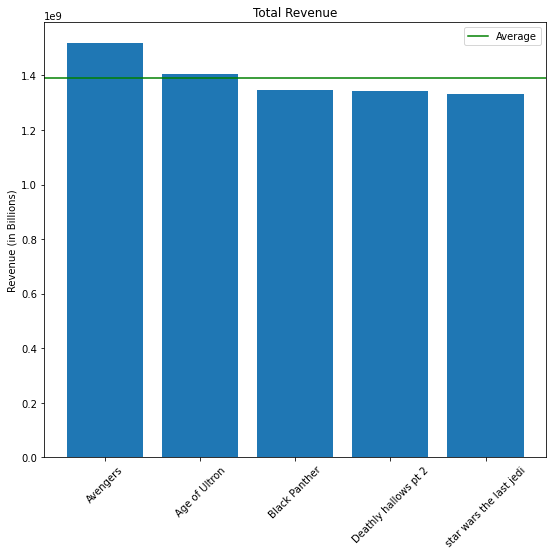

In [19]:
fig, ax = plt.subplots(figsize = (9,8))

height = [1518900000.0, 1405400000.0, 1347000000.0, 1341500000.0, 1332600000.0]
x = range(len(height))
labels = ['Avengers', 'Age of Ultron', 'Black Panther', 'Deathly hallows pt 2', 'star wars the last jedi']
height_mean = round(sum(height) / len(height))
ax.axhline(height_mean, color = 'green')
ax.bar(x, height, tick_label = labels)
ax.set_title('Total Revenue')
ax.set_ylabel('Revenue (in Billions)')
ax.set_xticklabels(labels, rotation = 45)
plt.legend(['Average'])
plt.show();

## Domestic and Foreign gross

Lets look into how these films fair domestic vs foreign, and see if the locations these films are shown effects gross revenue

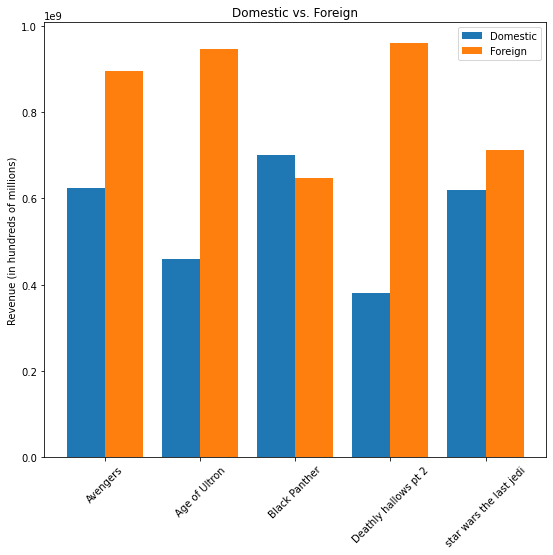

In [20]:
fig, ax = plt.subplots(figsize = (9,8))
y1 = [623400000.0, 459000000.0, 700100000.0, 381000000.0, 620200000.0] # domestic
y2 = [895500000.0, 946400000.0, 646900000.0, 960500000.0, 712400000.0] # foreign
x = np.arange(len(y1))
width = 0.40
plt.bar(x-0.2, y1,width)
plt.bar(x+0.2,y2,width)
plt.xticks(x, [ 'Avengers', 'Age of Ultron', 'Black Panther', 'Deathly hallows pt 2', 'star wars the last jedi'])
ax.set_title('Domestic vs. Foreign')
ax.set_ylabel('Revenue (in hundreds of millions)')
ax.set_xticklabels(labels, rotation = 45)
plt.legend(['Domestic', 'Foreign'])
plt.show();

Foreign gross wins out with every movie except black panter. This isn't as surprising as you initially may think. While Domestic (USA) is a very large population, Foreign includes mostly the entire rest of the globe. This just goes to show that, while the USA market is very important, the global markes is just as, if not more important. 

# Genre

Firstly, lets look into genre and see how much the type of film being produced effects its overall success.

In [21]:
df2.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.00,"Action,Crime,Drama",7.00,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.00,"Biography,Drama",7.20,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.00,Drama,6.90,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.10,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.00,"Comedy,Drama,Fantasy",6.50,119


Above, we can see a lot more information regarding rating, genres and even how many votes were cast for the ratings. Lets pull up the top grossing fills from before and see what genre they are.

In [22]:
df2[df2['primary_title'] == 'The Avengers']

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
325,tt0848228,The Avengers,The Avengers,2012,143.00,"Action,Adventure,Sci-Fi",8.10,1183655


In [23]:
df2[df2['primary_title'] == 'Avengers: Age of Ultron']

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
24058,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,141.00,"Action,Adventure,Sci-Fi",7.30,665594


In [24]:
df2[df2['primary_title'] == 'Black Panther']

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
11240,tt1825683,Black Panther,Black Panther,2018,134.00,"Action,Adventure,Sci-Fi",7.30,516148


In [25]:
df2[df2['primary_title'] == 'Harry Potter and the Deathly Hallows: Part 2']

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
1291,tt1201607,Harry Potter and the Deathly Hallows: Part 2,Harry Potter and the Deathly Hallows: Part 2,2011,130.00,"Adventure,Drama,Fantasy",8.10,691835


In [26]:
df2[df2['primary_title'] == 'Star Wars: The Last Jedi']

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
26070,tt2527336,Star Wars: The Last Jedi,Star Wars: Episode VIII - The Last Jedi,2017,152.00,"Action,Adventure,Fantasy",7.10,462903


We can definitely see a trend here, with the top 5 being a combination of action, adventure, sci-fi or fantasy. Lets do a little digging into what the top genres are by entry count. 

In [27]:
df2['genres'].value_counts().head(6)

genres
Drama           11612
Documentary     10313
Comedy           5613
Horror           2692
Comedy,Drama     2617
Thriller         1555
Name: count, dtype: int64

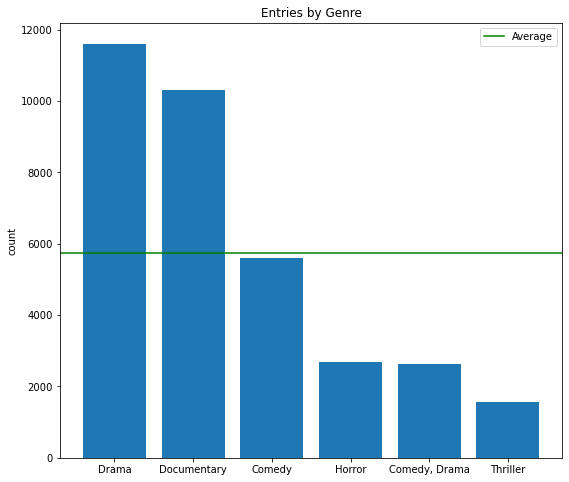

In [28]:
fig, ax = plt.subplots(figsize = (9,8))

height = [11612, 10313, 5613, 2692, 2617, 1555]
x = range(len(height))
labels = ['Drama', 'Documentary', 'Comedy', 'Horror', 'Comedy, Drama', 'Thriller']
height_mean = round(sum(height) / len(height))
ax.axhline(height_mean, color = 'green')
ax.bar(x, height, tick_label = labels)
ax.set_title('Entries by Genre')
ax.set_ylabel('count')
plt.legend(['Average'])
plt.show();

We can see above, that none of the genres our top movies are crack the top 6 of entries. Lets see how they compare to the top entries.

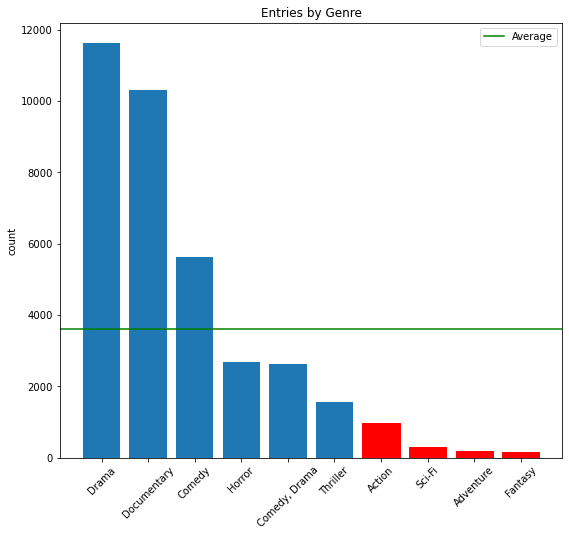

In [29]:
fig, ax = plt.subplots(figsize = (9,8))

height = [11612, 10313, 5613, 2692, 2617, 1555, 979, 295, 176, 147]
x = range(len(height))
labels = ['Drama', 'Documentary', 'Comedy', 'Horror', 'Comedy, Drama', 'Thriller', 'Action', 'Sci-Fi', 'Adventure', 'Fantasy']
height_mean = round(sum(height) / len(height))
ax.axhline(height_mean, color = 'green')
bar_list = ax.bar(x, height, tick_label = labels)
bar_list[6].set_color('r')
bar_list[7].set_color('r')
bar_list[8].set_color('r')
bar_list[9].set_color('r')
ax.set_xticklabels(labels, rotation = 45)
ax.set_title('Entries by Genre')
ax.set_ylabel('count')
plt.legend(['Average'])
plt.show();

It's a little odd how the seemingly most popular films dont actually have that many films (comparatively) to other genres. This may be something to note, as this could be a sign of a market that doesnt have many competators, and it could be wise to jump into the market ahead of other studios.  

# Rating

Ratings are an important metric that most studios and customers value. Lets look into the ratings of our top 6 genres  

Utilized Function:

`get_g_rating`

This function finds the average rating for a specified genre.

In [30]:
get_g_rating('Drama')

6.49

In [31]:
get_g_rating('Documentary')

7.29

In [32]:
get_g_rating('Comedy')

5.78

In [33]:
get_g_rating('Horror')

4.84

In [34]:
get_g_rating('Comedy,Drama')

6.36

In [35]:
get_g_rating('Thriller')

5.7

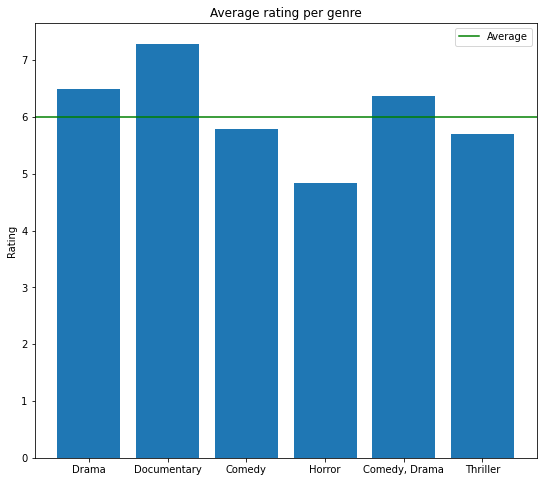

In [36]:
fig, ax = plt.subplots(figsize = (9,8))

height = [6.49, 7.29, 5.78, 4.84, 6.36, 5.7]
x = range(len(height))
labels = ['Drama', 'Documentary', 'Comedy', 'Horror', 'Comedy, Drama', 'Thriller']
height_mean = round(sum(height) / len(height))
ax.axhline(height_mean, color = 'green')
ax.bar(x, height, tick_label = labels)
ax.set_title('Average rating per genre')
ax.set_ylabel('Rating')
plt.legend(['Average'])
plt.show();

We can see that Documantary has the highest average rating for the top 6, with most falling close behined. 

Lets see how the genres of our top movies compare.

In [37]:
pd.read_sql('''
select primary_title, genres, averagerating
from movie_basics
join movie_ratings
using (movie_id)
where primary_title = 'The Avengers'
''',conn)

,primary_title,genres,averagerating
0,The Avengers,"Action,Adventure,Sci-Fi",8.10


In [38]:
pd.read_sql('''
select primary_title, genres, averagerating
from movie_basics
join movie_ratings
using (movie_id)
where primary_title = 'Avengers: Age of Ultron'
''',conn)

,primary_title,genres,averagerating
0,Avengers: Age of Ultron,"Action,Adventure,Sci-Fi",7.30


In [39]:
pd.read_sql('''
select primary_title, genres, averagerating
from movie_basics
join movie_ratings
using (movie_id)
where primary_title = 'Black Panther'
''',conn)

,primary_title,genres,averagerating
0,Black Panther,"Action,Adventure,Sci-Fi",7.30


In [40]:
pd.read_sql('''
select primary_title, genres, averagerating
from movie_basics
join movie_ratings
using (movie_id)
where primary_title = 'Harry Potter and the Deathly Hallows: Part 2'
''',conn)

,primary_title,genres,averagerating
0,Harry Potter and the Deathly Hallows: Part 2,"Adventure,Drama,Fantasy",8.10


In [41]:
pd.read_sql('''
select primary_title, genres, averagerating
from movie_basics
join movie_ratings
using (movie_id)
where primary_title = 'Star Wars: The Last Jedi'
''',conn)

,primary_title,genres,averagerating
0,Star Wars: The Last Jedi,"Action,Adventure,Fantasy",7.10


In [42]:
get_g_rating('Sci-Fi')

5.44

In [43]:
get_g_rating('Action')

5.76

In [44]:
get_g_rating('Adventure')

6.27

In [45]:
get_g_rating('Fantasy')

6.2

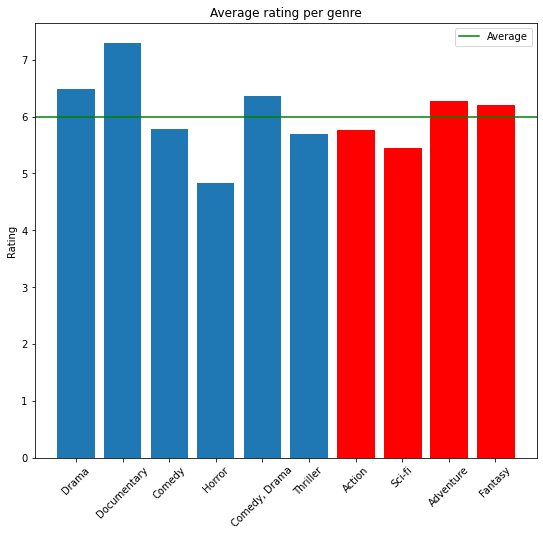

In [46]:
fig, ax = plt.subplots(figsize = (9,8))

height = [6.49, 7.29, 5.78, 4.84, 6.36, 5.7, 5.76, 5.44, 6.27, 6.2]
x = range(len(height))
labels = ['Drama', 'Documentary', 'Comedy', 'Horror', 'Comedy, Drama', 'Thriller','Action', 'Sci-fi', 'Adventure', 'Fantasy']
height_mean = round(sum(height) / len(height))
ax.axhline(height_mean, color = 'green')
bar_list = ax.bar(x, height, tick_label = labels)
bar_list[6].set_color('r')
bar_list[7].set_color('r')
bar_list[8].set_color('r')
bar_list[9].set_color('r')
ax.set_xticklabels(labels, rotation = 45)
ax.set_title('Average rating per genre')
ax.set_ylabel('Rating')
plt.legend(['Average'])
plt.show();

Here we can see something interesting, with the genres of the top movies by gross revenue having a similar rating as the genres by entry count. Its starting to look like creating films in these top genres are becoming over saturated as genres with less films are gaining popularity. 

None of the top movies by gross have a rating below a 7, but also none above 9. Lets see the movies that scored a 9 or above and see if theres any information there to be gathered.

In [47]:
pd.read_sql('''
select primary_title, averagerating, genres
from movie_basics
join movie_ratings
using (movie_id)
where averagerating >= 9
''',conn)

,primary_title,averagerating,genres
0,Mzungu (n.) White-Wanderer,9.20,"Adventure,Documentary,Drama"
1,We Are EC: The Untold Story of East Chicago Ba...,9.40,Documentary
2,The Road Forward,9.20,Documentary
3,One Angry Vegan,9.10,Documentary
4,British Winters,9.20,Drama
...,...,...,...
1421,Jersey,9.00,"Drama,Sport"
1422,Zulu Summer,9.30,Documentary
1423,Just One More Kiss,9.00,"Drama,Romance"
1424,Postal,9.30,Comedy


Just from this quick glance, we can see that a large amount of titles that scored a 9 or higher are documentaries. This is where a series could be more valuable. Movies within the marvel cinimatic Universe could be recieving a lower average rating but generating more income because one movie creates 'hype' for the next, allowing a snowball effect to take place where the customer sees a movie they like and becomes interested in that field, and becomes more likely to see a sequel or a title within the same universe.